In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

rc = {
    "font.family": "Latin modern",
    "font.size": 10,
    "axes.axisbelow": True,
    "grid.linestyle": '--',
    "axes.grid": True,
    "mathtext.fontset": "cm",
    "grid.alpha": 0.3,
    "text.usetex": True
}

# plt.rcParams.keys
plt.rcParams.update(rc)



In [29]:
from q_factor import get_q_df
q_values = get_q_df('./data_in/QVALUES.txt')

q_values['Q'] = q_values['Q'] * 1

q_values


,i_ref,Q
0,0.0,22.709
1,0.1,27.925
2,0.2,32.978
3,0.3,38.767
4,0.4,46.492
5,0.5,56.466
6,0.6,68.512
7,0.7,84.725
8,0.8,115.720
9,0.9,164.860


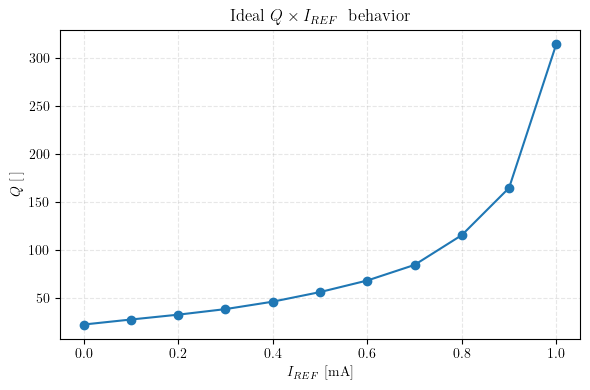

In [30]:
f, ax = plt.subplots(figsize=(6,4))

ax.plot(q_values['i_ref'], q_values['Q'], '-o')

ax.set(
  xlabel=r'$I_{REF}$ [mA]',
  ylabel='$Q \; [\;]$',
  title=r'Ideal $Q \times I_{REF}\;$ behavior'
)

f.tight_layout()

f.savefig('./fig/q-no-drop.pdf')

In [31]:
q_values = get_q_df('./data_in/QVALUES.txt', include_q_drop=True, drop_at=0.8)

q_values['Q'] = q_values['Q'] * 1

q_values


,i_ref,Q
0,0.0,22.709
1,0.1,27.925
2,0.2,32.978
3,0.3,38.767
4,0.4,46.492
5,0.5,56.466
6,0.6,68.512
7,0.7,84.725
8,0.8,20.000
9,0.9,20.000


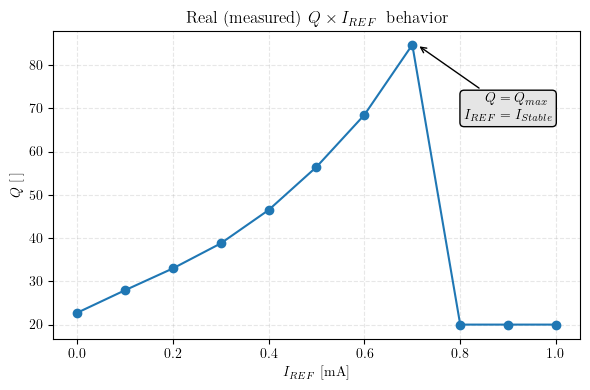

In [65]:
f, ax = plt.subplots(figsize=(6,4))

ax.plot(q_values['i_ref'], q_values['Q'], '-o')

ax.set(
  xlabel=r'$I_{REF}$ [mA]',
  ylabel='$Q \; [\;]$',
  title=r'Real (measured) $Q \times I_{REF}\;$ behavior'
)

ax.annotate(r"$Q = Q_{max}\;\\ I_{REF} = I_{Stable}$",
                  xy=(0.71, q_values['Q'].max()), xycoords="data",
                  xytext=(0.9, 70),
                  va="center", ha="center",
                  bbox=dict(boxstyle="round", fc="#E5E5E5"),
                  arrowprops=dict(arrowstyle="->"))

f.tight_layout()
f.savefig('./fig/q-iref-q_max-i_stable.pdf')